In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import numpy as np
PI2 = np.pi * 2

import matplotlib.pyplot as plt

from thinkdsp import decorate
from thinkdsp import UncorrelatedGaussianNoise

Создадим функции

In [2]:
def analyze1(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = np.linalg.solve(M, ys)
    return amps

def analyze2(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = M.dot(ys) / 2
    return amps

def dct_iv(ys):
    N = len(ys)
    ts = (0.5 + np.arange(N)) / N
    fs = (0.5 + np.arange(N)) / 2
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = np.dot(M, ys) / 2
    return amps

signal = UncorrelatedGaussianNoise()
wave = signal.make_wave(duration=1.0, framerate=16384)
wave.ys.shape

(16384,)

In [3]:
ns = 3 ** np.arange(3,9)
ns

array([  27,   81,  243,  729, 2187, 6561], dtype=int32)

In [4]:
best_analyze1 = []
for n in ns:
    ts = (0.5 + np.arange(n)) / n
    freqs = (0.5 + np.arange(n)) / 2
    ys = wave.ys[:n]
    best =  %timeit -r1 -o analyze1(ys,freqs,ts)
    best_analyze1.append(best.best)
best_analyze1

220 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
1.95 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
3.35 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
21 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
243 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
3.09 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


[0.00022015912999995635,
 0.0019518610000159242,
 0.003348273000010522,
 0.02100253700000394,
 0.24274788000002445,
 3.093593300000066]

In [5]:
best_analyze2 = []
for n in ns:
    ts = (0.5 + np.arange(n)) / n
    freqs = (0.5 + np.arange(n)) / 2
    ys = wave.ys[:n]
    best =  %timeit -r1 -o analyze2(ys,freqs,ts)
    best_analyze2.append(best.best)
best_analyze2

15.6 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
79 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
819 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
7.58 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
81.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
607 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


[1.564829000017198e-05,
 7.896043000000646e-05,
 0.000819016899999042,
 0.00758065699999861,
 0.08183504000007816,
 0.6073434000009001]

In [6]:
import scipy.fftpack

best_dct = []
for n in ns:
    ys = wave.ys[:n]
    best =  %timeit -r1 -o scipy.fftpack.dct(ys, type=3)
    best_dct.append(best.best)
best_dct

10.4 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
6.14 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
11.6 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
10.3 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
21.1 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
52.6 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)


[1.0438606000006985e-05,
 6.140949999989971e-06,
 1.1565881999995327e-05,
 1.034358799999609e-05,
 2.1092080000016723e-05,
 5.255548000004637e-05]

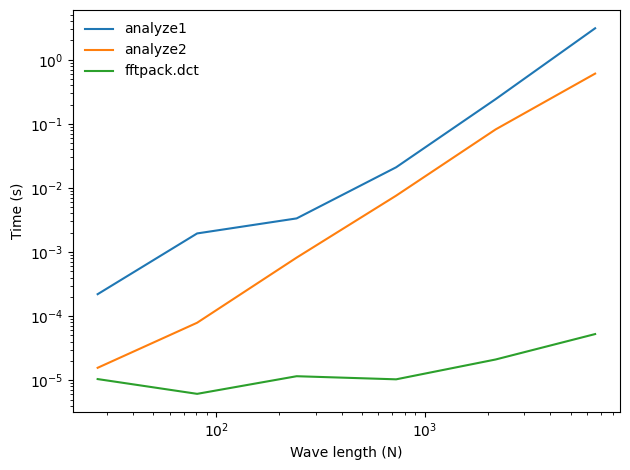

In [7]:
plt.plot(ns, best_analyze1, label='analyze1')
plt.plot(ns, best_analyze2, label='analyze2')
plt.plot(ns, best_dct, label='fftpack.dct')
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Wave length (N)', ylabel='Time (s)', **loglog)

По графикам видно, что оба результата скорее пропорциональны квадрату, а не кубу

In [8]:
from scipy.stats import linregress

linregress(np.log(ns),np.log(best_analyze1))

LinregressResult(slope=1.665955854481534, intercept=-14.15114319003083, rvalue=0.9850711612899739, pvalue=0.00033264174102209997, stderr=0.14556834399121016, intercept_stderr=0.9210056766845908)

В ячейке выше видно, что наклон для analyze1 равен 1.67, что гораздо меньше, чем 3

In [9]:
linregress(np.log(ns),np.log(best_analyze2))

LinregressResult(slope=1.973612738717539, intercept=-17.842457735749793, rvalue=0.9988417595812725, pvalue=2.011504399515299e-06, stderr=0.04753612956044484, intercept_stderr=0.3007593819671913)

In [10]:
linregress(np.log(ns),np.log(best_dct))

LinregressResult(slope=0.30354796506325454, intercept=-12.990378300328132, rvalue=0.8324082943126705, pvalue=0.03977689729536619, stderr=0.10104115829214036, intercept_stderr=0.6392837743037509)